In [ ]:
import pandas as pd

In [ ]:
krishna = pd.read_excel('/content/Krishna.xlsx')
godavari = pd.read_excel('/content/Godavari.xlsx')
cauvery = pd.read_excel('/content/Cauvery.xlsx')
mahanadi = pd.read_excel('/content/Mahanadi.xlsx')


In [ ]:
krishna['River'] = 'Krishna'
godavari['River'] = 'Godavari'
cauvery['River'] = 'Cauvery'
mahanadi['River'] = 'Mahanadi'


In [ ]:
merged_data = pd.concat([krishna, godavari, cauvery, mahanadi], ignore_index=True)


In [ ]:
merged_data.drop_duplicates(inplace=True)
merged_data.dropna(inplace=True)
merged_data.reset_index(drop=True, inplace=True)


In [ ]:
merged_data.to_excel('merged_river_data.xlsx', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.read_excel('merged_river_data.xlsx')


In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29843 entries, 0 to 29842
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           29843 non-null  datetime64[ns]
 1   Discharge      29843 non-null  int64         
 2   flood runoff   29843 non-null  float64       
 3   daily runoff   29843 non-null  float64       
 4   weekly runoff  29843 non-null  float64       
 5   Flood          29843 non-null  float64       
 6   River          29843 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.6+ MB
None


In [ ]:
print(merged_data.head())

        Date  Discharge  flood runoff  daily runoff  weekly runoff  Flood  \
0 1998-01-07       1597           0.0          0.53           2.06    0.0   
1 1998-01-08       1597           0.0          0.53           2.30    0.0   
2 1998-01-09       1423           0.0          0.47           2.49    0.0   
3 1998-01-10        254           0.0          0.08           2.35    0.0   
4 1998-01-11          0           0.0          0.00           2.12    0.0   

     River  
0  Krishna  
1  Krishna  
2  Krishna  
3  Krishna  
4  Krishna  


In [ ]:
print(merged_data.isnull().sum())


Date             0
Discharge        0
flood runoff     0
daily runoff     0
weekly runoff    0
Flood            0
River            0
dtype: int64


In [ ]:
merged_data.fillna(0, inplace=True)


In [ ]:
flood_count = merged_data.groupby('River')['Flood'].sum().sort_values(ascending=False)
print(flood_count)


River
Cauvery     286.1
Krishna     267.2
Mahanadi    256.9
Godavari    222.5
Name: Flood, dtype: float64


/tmp/ipython-input-614426745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flood_count.index, y=flood_count.values, palette='coolwarm')


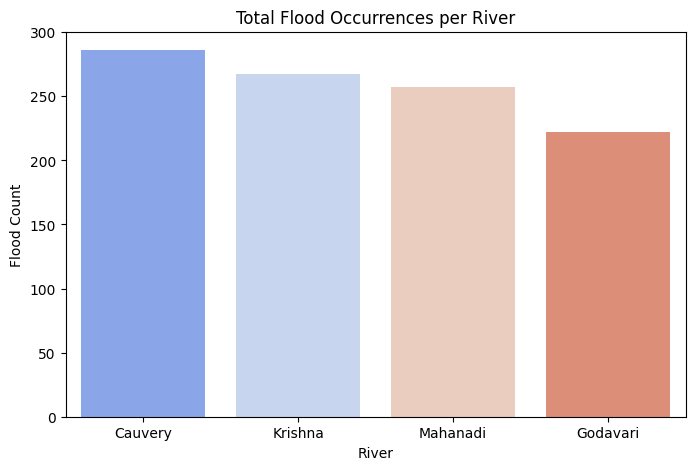

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=flood_count.index, y=flood_count.values, palette='coolwarm')
plt.title('Total Flood Occurrences per River')
plt.xlabel('River')
plt.ylabel('Flood Count')
plt.show()


River
Godavari    3828.639613
Krishna     2467.194563
Mahanadi    2046.008509
Cauvery     1034.549162
Name: Discharge, dtype: float64


/tmp/ipython-input-1144840563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discharge.index, y=avg_discharge.values, palette='Blues')


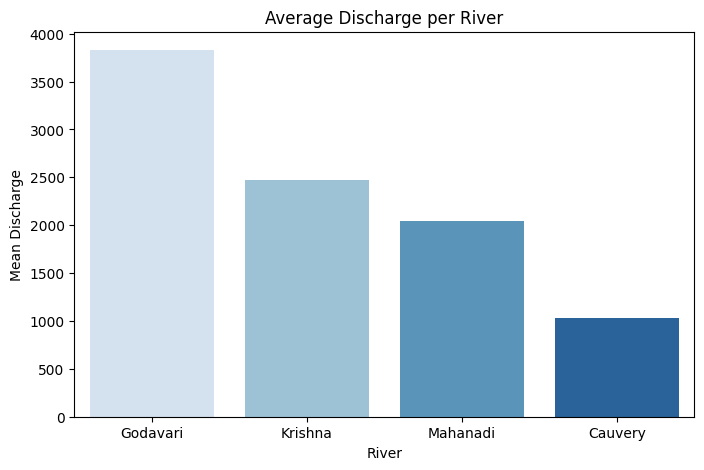

In [ ]:
avg_discharge = merged_data.groupby('River')['Discharge'].mean().sort_values(ascending=False)
print(avg_discharge)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_discharge.index, y=avg_discharge.values, palette='Blues')
plt.title('Average Discharge per River')
plt.xlabel('River')
plt.ylabel('Mean Discharge')
plt.show()


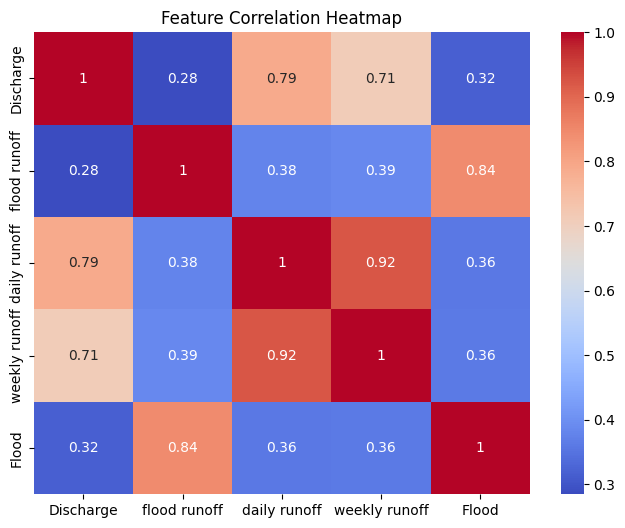

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(merged_data[['Discharge','flood runoff','daily runoff','weekly runoff','Flood']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

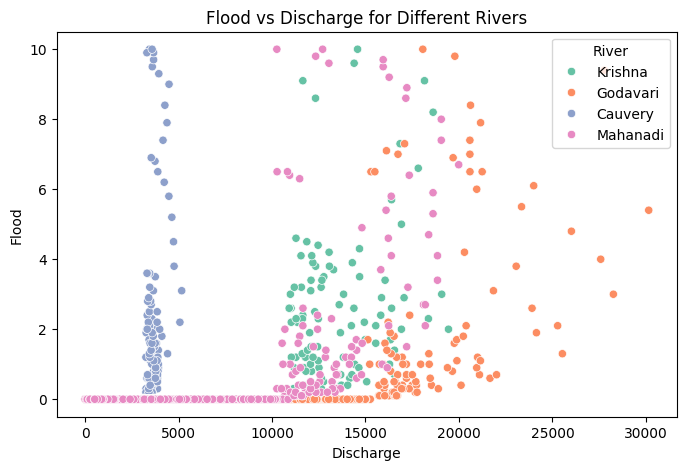

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_data, x='Discharge', y='Flood', hue='River', palette='Set2')
plt.title('Flood vs Discharge for Different Rivers')
plt.xlabel('Discharge')
plt.ylabel('Flood')
plt.show()

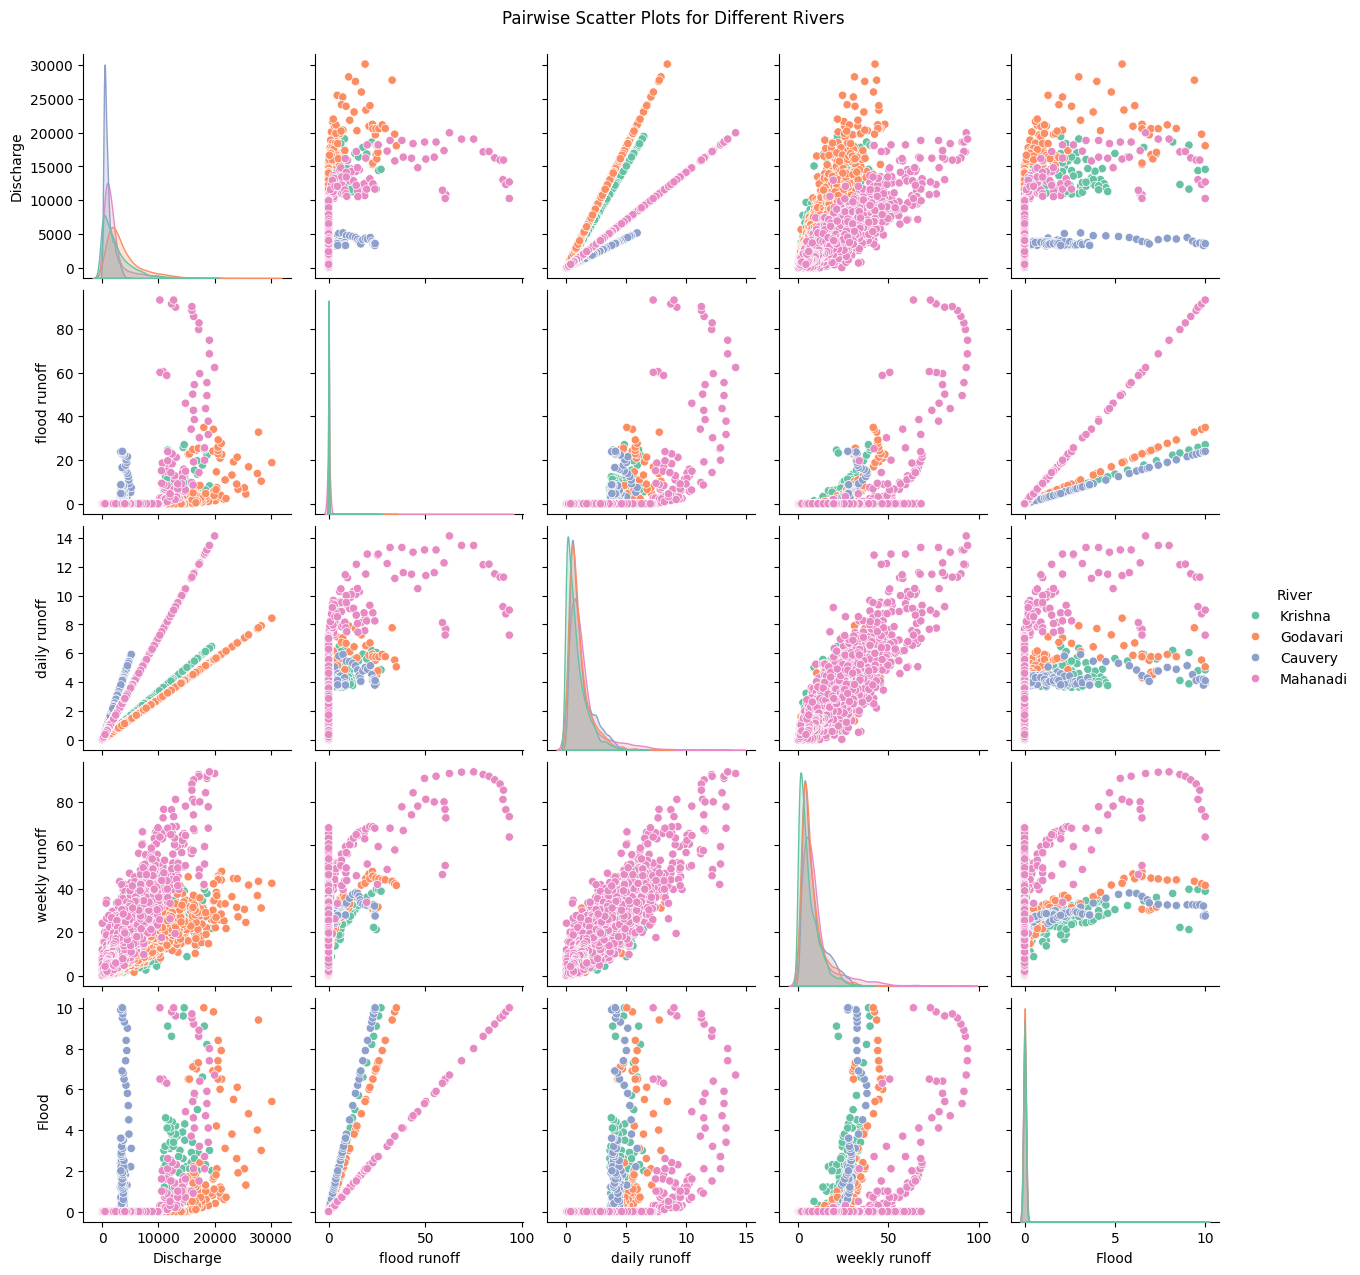

In [ ]:
sns.pairplot(merged_data, hue='River', palette='Set2')
plt.suptitle('Pairwise Scatter Plots for Different Rivers', y=1.02)
plt.show()

River
Cauvery     286.1
Krishna     267.2
Mahanadi    256.9
Godavari    222.5
Name: Flood, dtype: float64


/tmp/ipython-input-3705582902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flood_by_river.index, y=flood_by_river.values, palette='coolwarm')


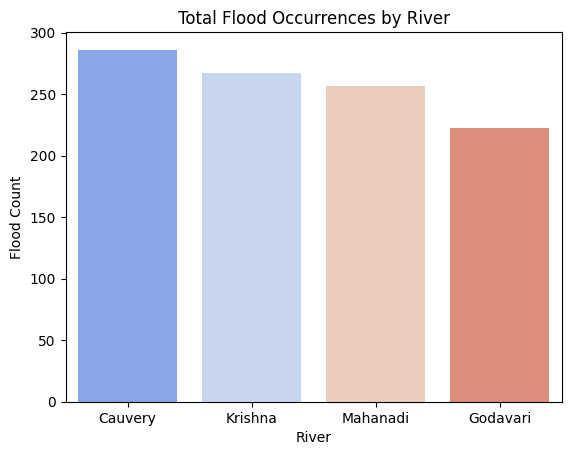

In [ ]:
flood_by_river = merged_data.groupby('River')['Flood'].sum().sort_values(ascending=False)
print(flood_by_river)

sns.barplot(x=flood_by_river.index, y=flood_by_river.values, palette='coolwarm')
plt.title('Total Flood Occurrences by River')
plt.xlabel('River')
plt.ylabel('Flood Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
merged_data['River'] = merged_data['River'].astype('category')

# Define features (X) and target (y)
X = merged_data[['Discharge', 'flood runoff', 'daily runoff', 'weekly runoff']]
y = (merged_data['Flood'] > 0).astype(int) # Convert 'Flood' to binary (0 or 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9981571452504607


In [40]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9998324677500419


In [41]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:06:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9998324677500419


/tmp/ipython-input-3360592756.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


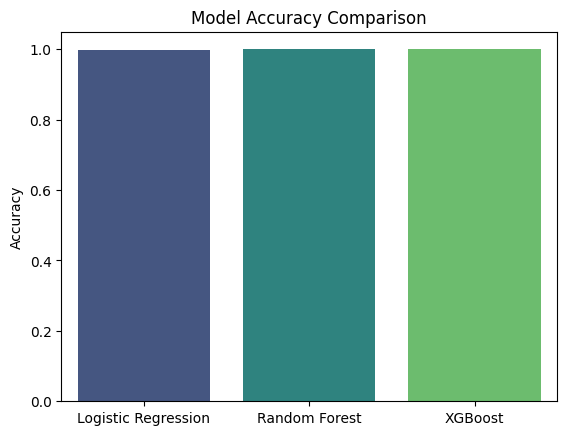

In [42]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
